In [1]:
using SAC
using DSP
using PyPlot

In [2]:
data = SAC.read("Patricia100.sac");

INFO: Data are little-endian; byteswapping


In [3]:
tsdata = collect(0:data.npts-1)*data.delta; #Vector de tiempo

In [4]:
length(tsdata)

2520000

In [4]:
dsdata = 1/(data.delta*data.npts);
nn = convert(Int32,floor(data.npts/2) + 1);
Fdata=collect(0:data.npts-1)*dsdata;

In [6]:
length(Fdata)

2520000

In [7]:
#Vector de fecha/tiempo
#tt=collect(DateTime(2015,10,23):Dates.minute(10):DateTime(2015,10,24))

In [5]:
#Conversión de unidades V(m/s)= count*1.164153nV/28.8V/(m/s)
data.t = data.t*(0.000000000051059342);

In [6]:
rmean!(data) #Quitar el promedio
rtrend!(data); #Quitar tendencia lineal

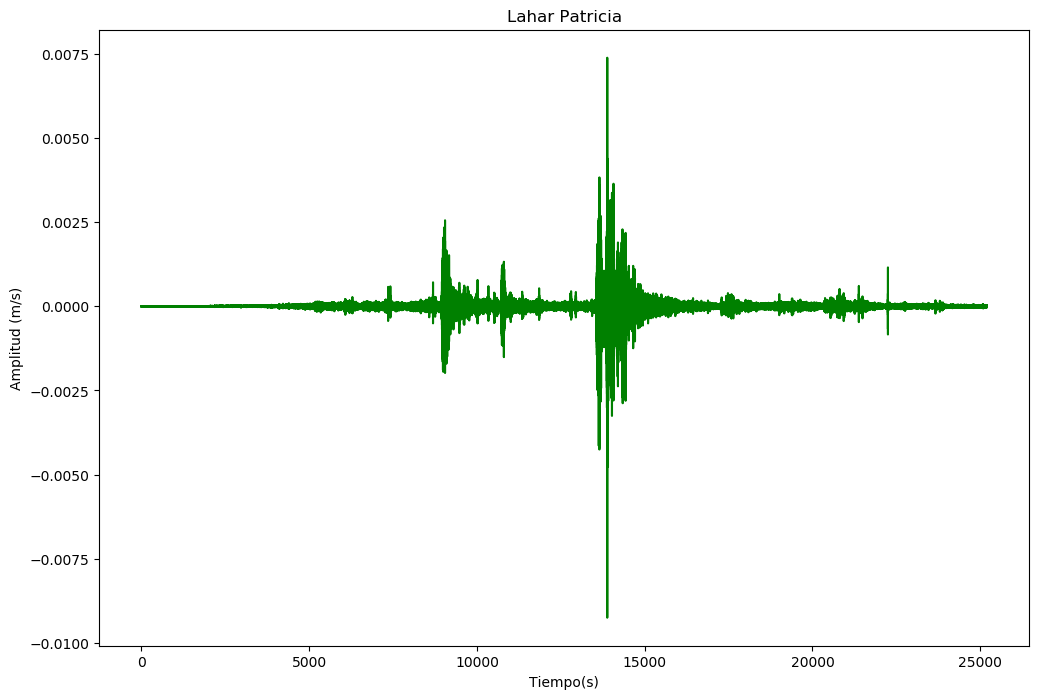

OMP: Warning #72: KMP_AFFINITY: affinity only supported for Intel(R) processors.
OMP: Warning #71: KMP_AFFINITY: affinity not supported, using "none".


PyObject <matplotlib.text.Text object at 0x0000000022E594E0>

In [7]:
fig = figure(figsize=(12,8))
plot(tsdata,data.t,"g")
title("Lahar Patricia")
xlabel("Tiempo(s)")
ylabel("Amplitud (m/s)")

In [11]:
#Envolvente
env = abs.(hilbert(data.t));

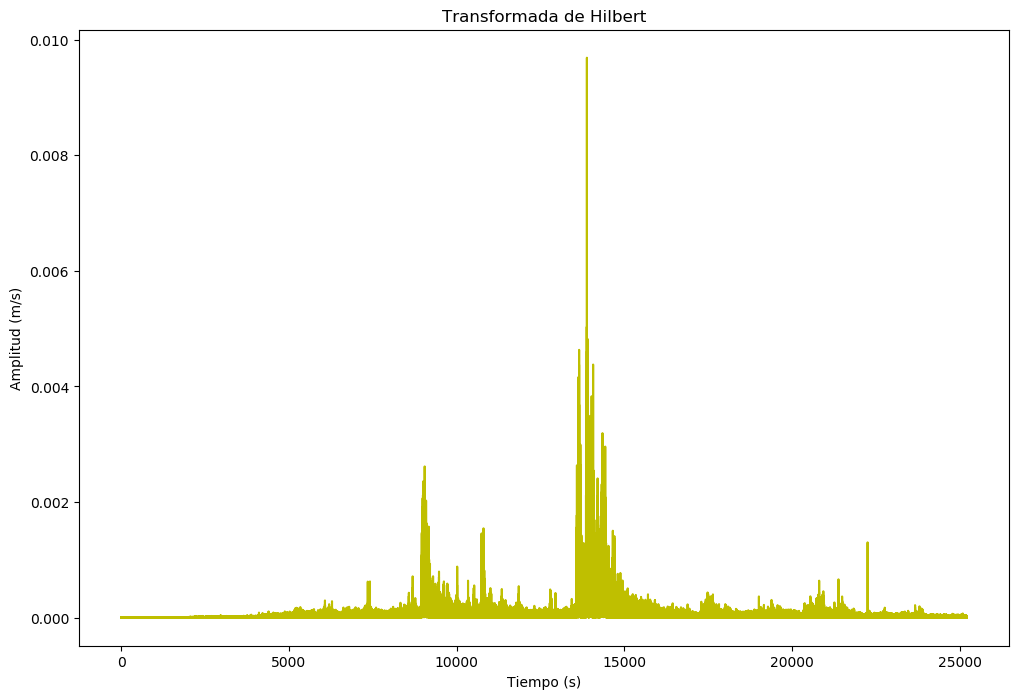

PyObject <matplotlib.text.Text object at 0x0000000022F032E8>

In [12]:
fig = figure(figsize=(12,8))
plot(tsdata,env,"y")
title("Transformada de Hilbert")
xlabel("Tiempo (s)")
ylabel("Amplitud (m/s)")

In [13]:
#fft: Espectro
spc = abs.(fft(data.t,1));

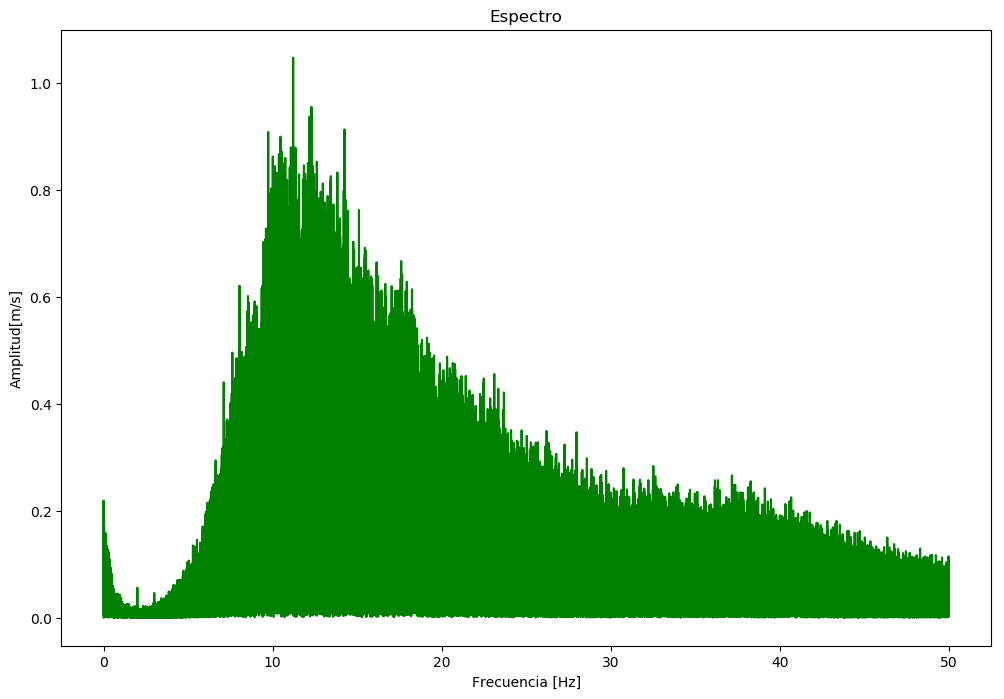

PyObject <matplotlib.text.Text object at 0x000000002B0C6B70>

In [14]:
fig = figure(figsize=(12,8))
plot(Fdata[1:nn],spc[1:nn],"g")
title("Espectro")
xlabel("Frecuencia [Hz]")
ylabel("Amplitud[m/s]")

In [15]:
resp = Bandpass(6,50,fs=101)
desig = Butterworth(6)
datafilt = filt(digitalfilter(resp,desig),data.t);

In [16]:
datafilt = welch_pgram(datafilt,fs=100);

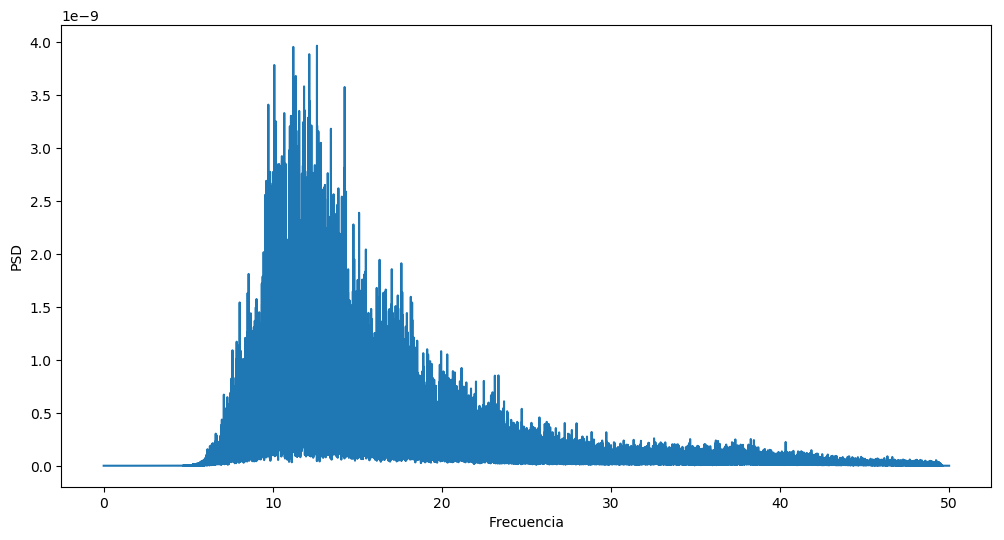

PyObject <matplotlib.text.Text object at 0x00000000230D0B38>

In [17]:
fig = figure(figsize=(12,6))
plot(datafilt.freq,datafilt.power,label="Filter")
xlabel("Frecuencia")
ylabel("PSD")

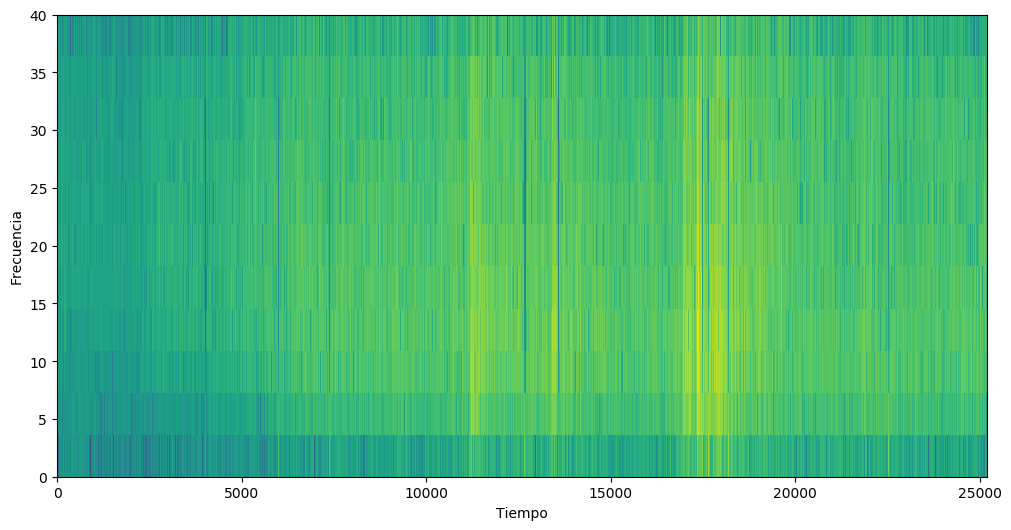

PyObject <matplotlib.text.Text object at 0x0000000049431828>

In [25]:
#Espectrograma
fig = figure(figsize=(12,6))
specgram(data.t,20,80,pad_to=20,noverlap=15)
xlim(0,maximum(tsdata))
xlabel("Tiempo")
ylabel("Frecuencia")